In [1]:
import numpy as np
# import pixell
# from pixell import enmap, enplot
from astropy.io import fits
# def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs))
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo, z_at_value
import astropy.units as u

In [2]:
import healpy as hp

In [3]:
act_ymap = hp.read_map("/mnt/raid-cita/mlokken/data/act_ymaps/ilc_SZ_yy_4096_hpx.fits")


In [4]:
mask = hp.read_map("/mnt/raid-cita/mlokken/data/act_ymaps/wide_mask_GAL080_apod_3.00_deg_4096_hpx.fits")

In [5]:
act_ymap[mask<.08]=hp.UNSEEN

In [6]:
act_ymap_masked = hp.ma(act_ymap)

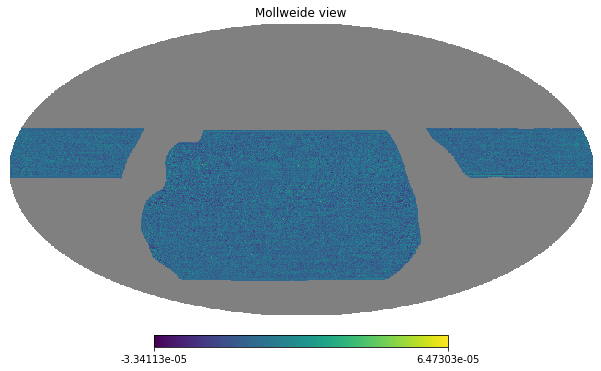

In [7]:
hp.mollview(act_ymap_masked)

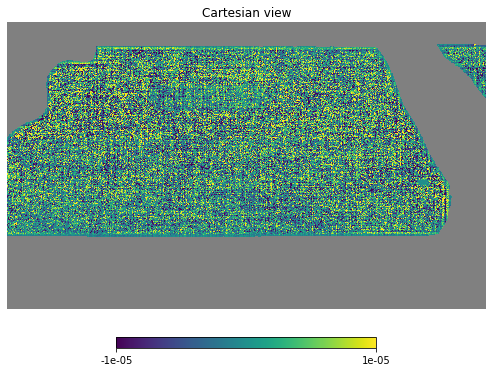

In [8]:
hp.cartview(act_ymap, lonra=[-100, 100], latra=[-90,30], max=1e-5, min=-1e-5)

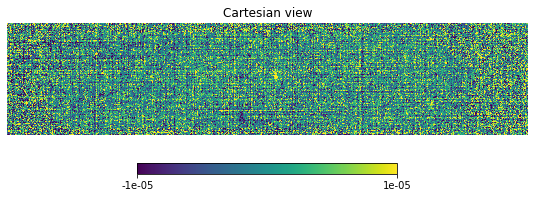

In [9]:
d56 = hp.cartview(act_ymap, lonra=[-15, 45], latra=[-8,5], max=1e-5, min=-1e-5, return_projected_map=True)
d56_avg = np.average(d56)
d56_sigma = np.std(d56)

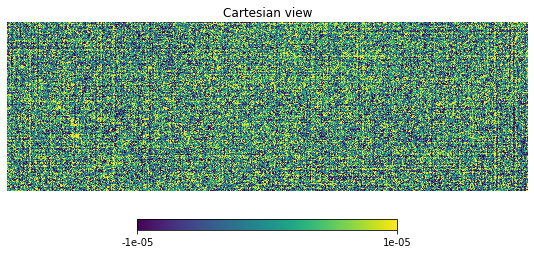

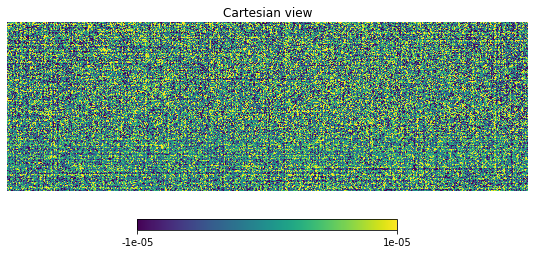

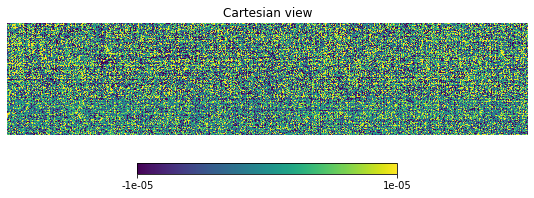

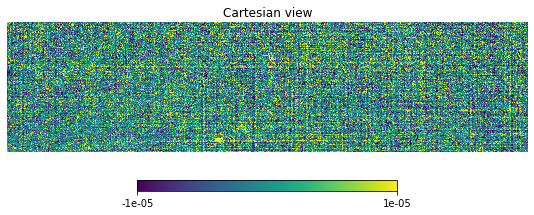

In [10]:
reg1 = hp.cartview(act_ymap, lonra=[-60, -20], latra=[-8,5], max=1e-5, min=-1e-5, return_projected_map=True)
reg1_avg = np.average(reg1)
reg1_sigma = np.std(reg1)

reg2 = hp.cartview(act_ymap, lonra=[-60, -20], latra=[-23,-10], max=1e-5, min=-1e-5, return_projected_map=True)
reg2_avg = np.average(reg2)
reg2_sigma = np.std(reg2)

reg3 = hp.cartview(act_ymap, lonra=[20, 80], latra=[-23,-10], max=1e-5, min=-1e-5, return_projected_map=True)
reg3_avg = np.average(reg3)
reg3_sigma = np.std(reg3)

reg4 = hp.cartview(act_ymap, lonra=[20, 80], latra=[-55,-40], max=1e-5, min=-1e-5, return_projected_map=True)
reg4_avg = np.average(reg4)
reg4_sigma = np.std(reg4)


In [11]:
print(d56_sigma, reg1_sigma, reg2_sigma, reg3_sigma, reg4_sigma)
print(d56_avg, reg1_avg, reg2_avg, reg3_avg, reg4_avg)
reg_other_sigma = (reg1_sigma+ reg2_sigma+ reg3_sigma+reg4_sigma)/4

5.9000886117862625e-06 7.267679162089425e-06 7.083834991328123e-06 7.336052648219262e-06 5.677689298542457e-06
1.5367872282072424e-07 2.7048729252456195e-07 9.616822180943225e-08 -2.3918994770036764e-07 -2.597841056212644e-07


In [12]:
print("D56 region has {:.2f} percent lower standard deviation than the other regions".format((reg_other_sigma-d56_sigma)/(reg_other_sigma)*100))

D56 region has 13.76 percent lower standard deviation than the other regions


D56 noise similar to lower map noise, generally varies ~20 % between regions

# now let's figure out variance per patch

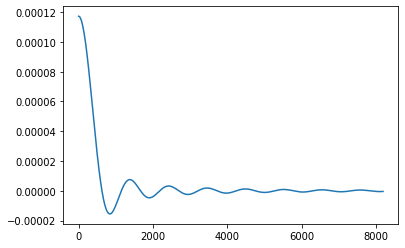

<Figure size 432x288 with 0 Axes>

In [13]:
# smooth the y map with top hat
nside = 4096
theta = np.linspace(0, np.deg2rad(0.35))
beam  = np.ones(len(theta))
beam = hp.beam2bl(beam, theta, nside*2)
plt.plot(np.arange(nside*2+1), beam)
plt.show()
plt.clf()
smthmap = hp.smoothing(act_ymap_masked, beam_window=beam, lmax=nside*2)

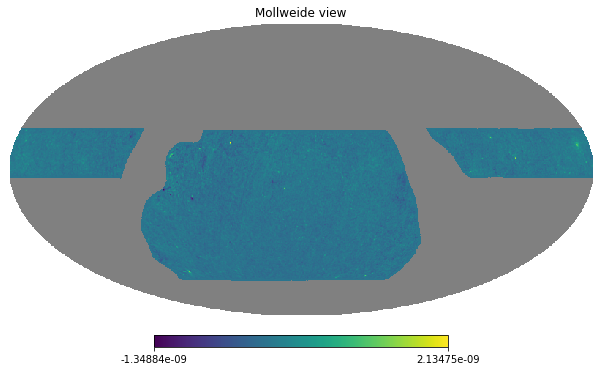

In [14]:
hp.mollview(smthmap)

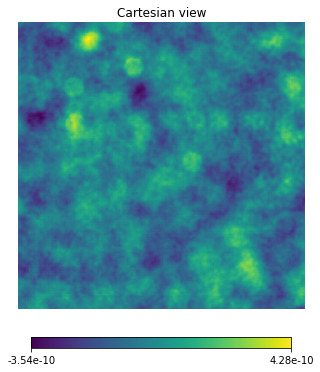

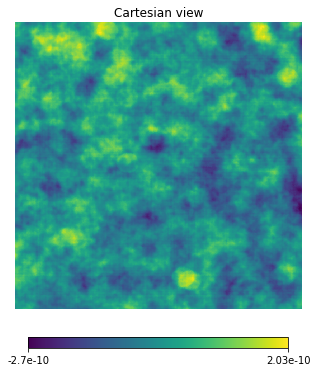

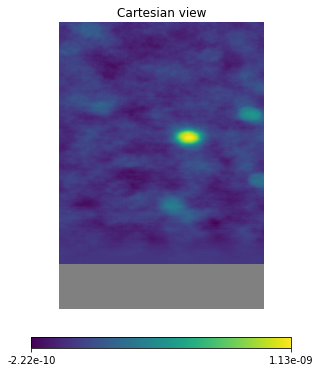

In [15]:
hp.cartview(smthmap, lonra=[34, 44], latra=[-10,0]) # high
hp.cartview(smthmap, lonra=[24,34], latra=[-30,-20]) # lowest
hp.cartview(smthmap, lonra=[52,62], latra=[-62,-48]) #highest

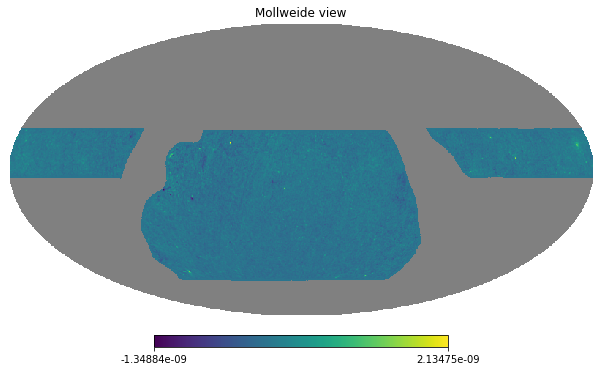

In [16]:
hp.mollview(smthmap)

In [17]:
allpix = np.arange(hp.nside2npix(4096))
allra, alldec = hp.pix2ang(4096, allpix, lonlat=True)


In [18]:
import coop_setup_funcs as csf
object_path = "/mnt/raid-cita/mlokken/data/cluster_cats/combined_actdes_mask_pt8_y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl50_catalog.fit"
ra_cl,dec_cl,z_cl,richness = csf.get_radeczlambda(object_path)
rich_cond = richness > 20
ra_cl,dec_cl,z_cl  = ra_cl[rich_cond], dec_cl[rich_cond], z_cl[rich_cond]


In [23]:
smthmap[smthmap!=hp.UNSEEN]

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-1.6375e+30)

In [30]:
smthmap.mask

array([ True,  True,  True, ...,  True,  True,  True])

52


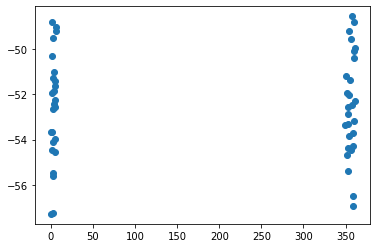

0.12652334101095258
region done
51


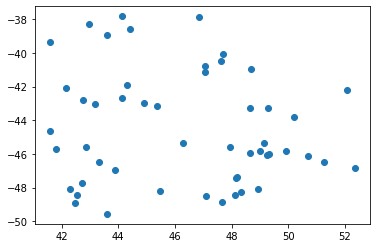

0.46311304612654347
region done
36


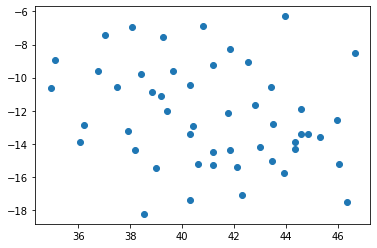

0.5120904445950563
region done
79


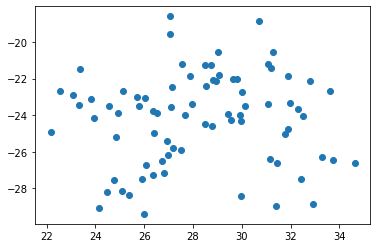

0.3043763642023278
region done
64


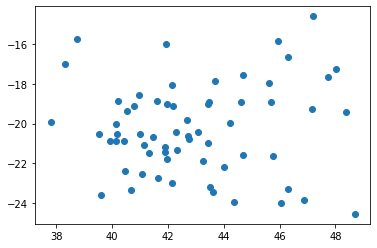

0.9089079588002302
region done
58


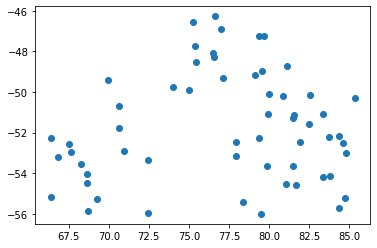

0.40686909649811837
region done
50


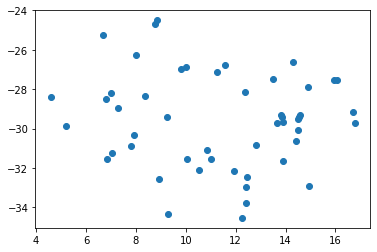

0.6749396295149565
region done
36


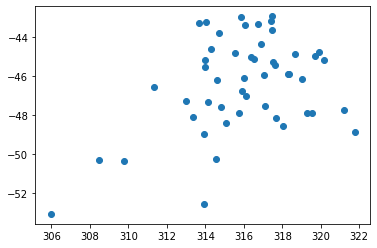

0.4316408738677189
region done
73


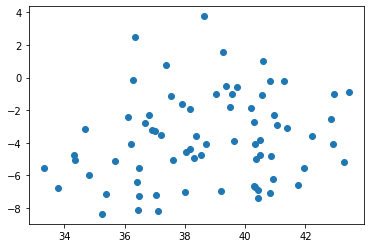

1.1225132167828664
region done
66


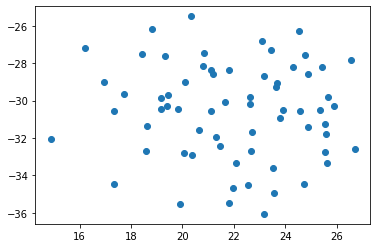

0.33172728218798436
region done
29


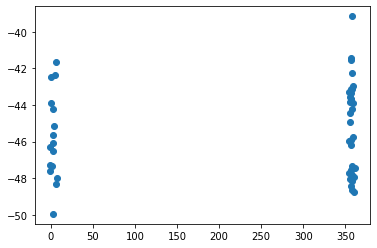

0.529915779683448
region done
48


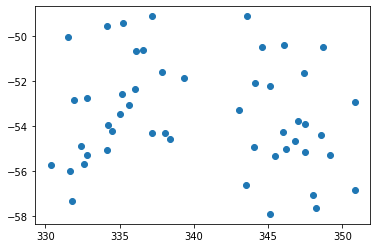

0.5610503099744216
region done
61


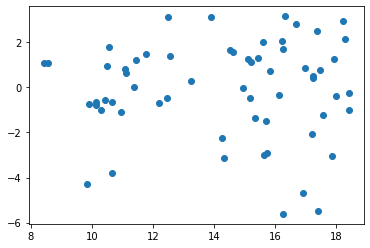

0.6509786886942035
region done
76


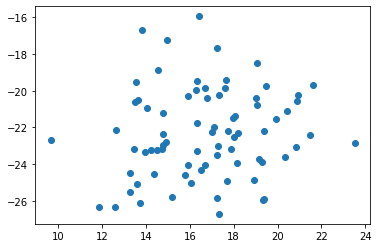

0.28150249323156107
region done
69


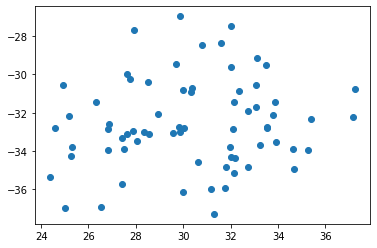

0.16838779639210347
region done
41


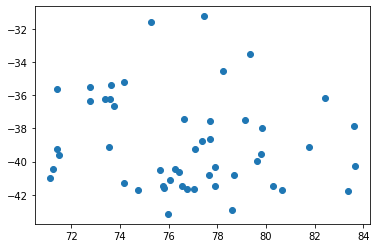

0.482245278014214
region done
42


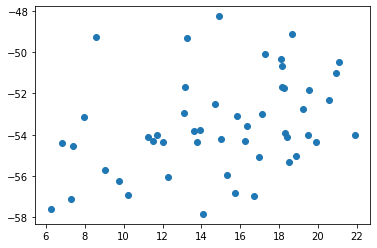

0.38017286790126553
region done
47


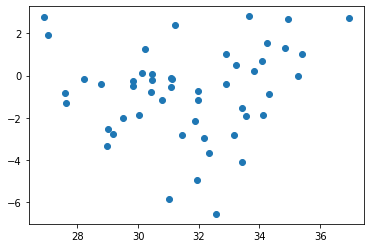

0.7022122787199573
region done
70


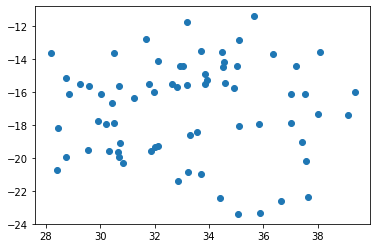

0.5347662309822497
region done
62


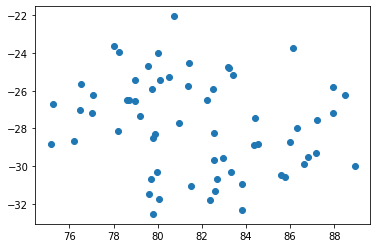

0.730181403219661
region done
30


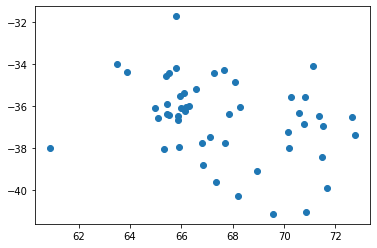

0.44891404105338284
region done
60


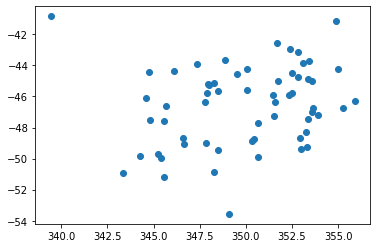

0.35013750688256184
region done
62


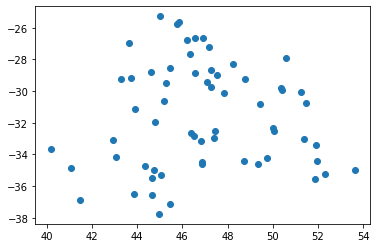

0.7232627180436992
region done
38


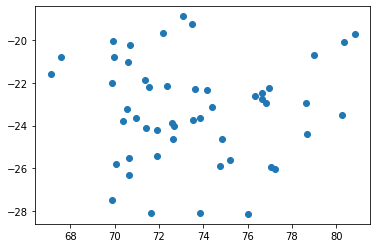

0.37550219113246464
region done
68


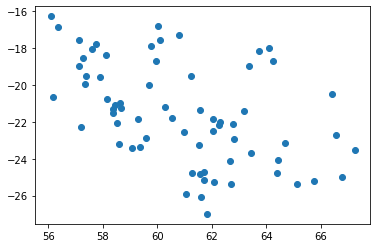

0.896762304200988
region done
38


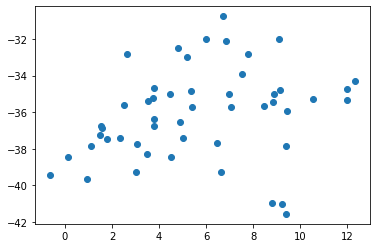

1.0077544444447981
region done
85


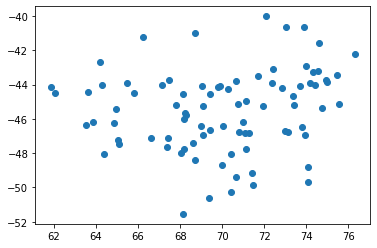

0.5552853162061697
region done
62


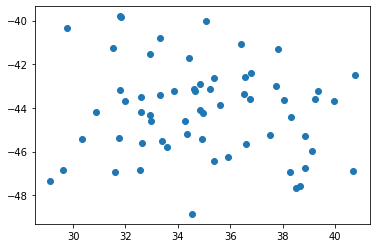

0.7060498171308597
region done
44


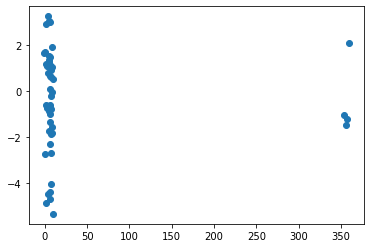

0.6634186096585178
region done
49


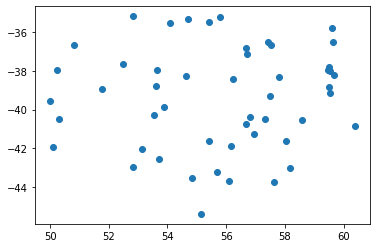

0.8954551849226251
region done
27


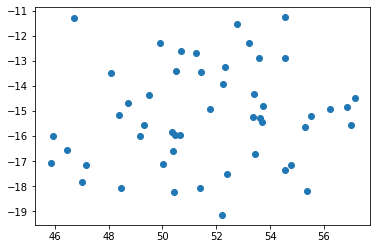

0.4521634205332233
region done
28


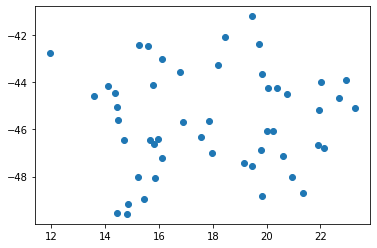

0.4811690714456213
region done
69


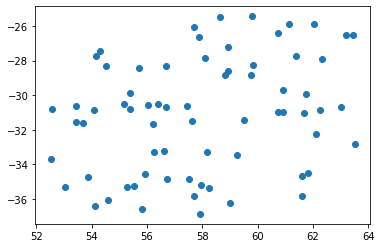

0.634452311791089
region done
30


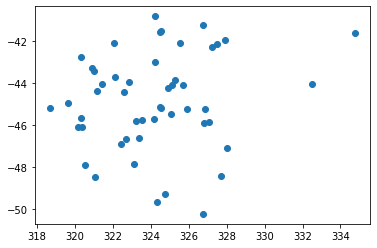

0.18546336086328938
region done
39


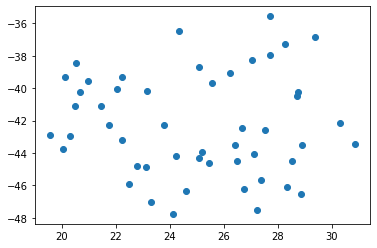

0.6007419022343081
region done
69


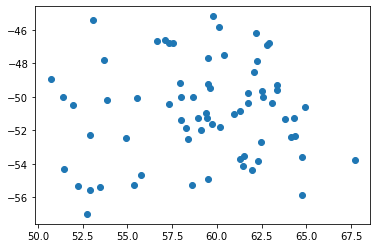

1.0502624801503975
region done
76


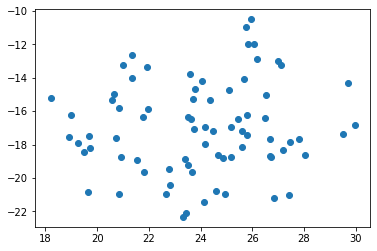

0.31078297858822745
region done
31


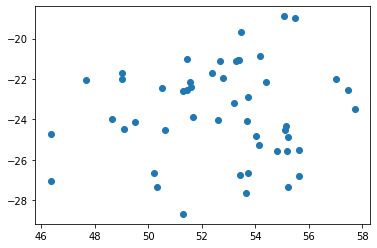

0.29218457371739376
region done
78


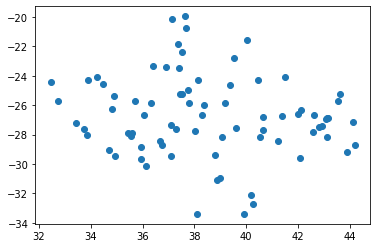

0.7848517197225978
region done
59


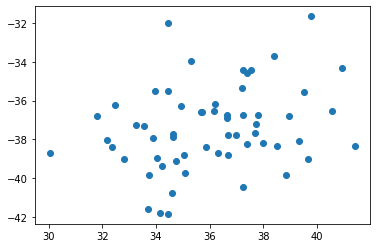

0.6329466303007725
region done
38


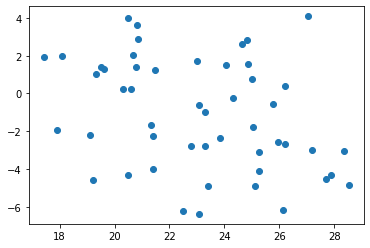

0.9158594931900864
region done
40


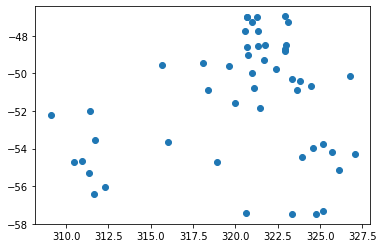

0.6545021442962593
region done
80


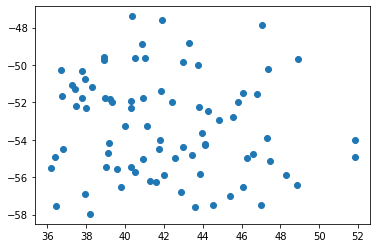

0.33103765273239444
region done
51


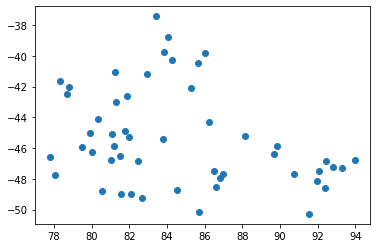

1.5799622709900008
region done
46


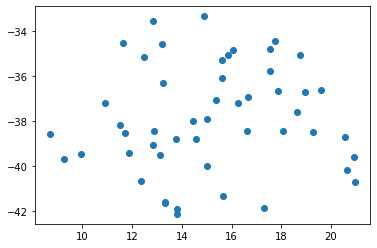

0.5062955036405398
region done
50


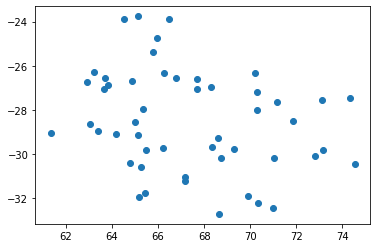

0.550281429439699
region done
65


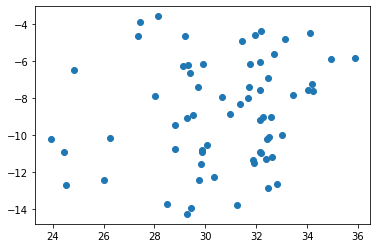

0.7381825998538354
region done
42


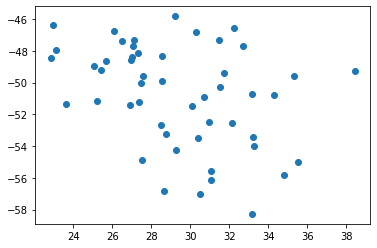

0.742749296499337
region done


<Figure size 432x288 with 0 Axes>

In [31]:
# example with a given redshift bin
nuse = 50 # update

dlow = 893 * u.Mpc
dhi  = 1393 * u.Mpc
cl_zlow = z_at_value(cosmo.comoving_distance, dlow)
cl_zhi  = z_at_value(cosmo.comoving_distance, dhi)
reg_variance = []
allpix_choice = np.random.choice(allpix[~smthmap.mask], size=nuse, replace=False)
mapvar = np.var(smthmap[allpix_choice])
for reg in range(48):
    labels       = np.loadtxt("/home/mlokken/oriented_stacking/general_code/labels_48_regions_ACTxDES_lambdagt20.txt")
    cl_inbin     = (cl_zlow<z_cl)&(z_cl<cl_zhi) # just need this for the boolean array to subselect from labels list                                                                            
    labels_inbin = labels[cl_inbin]
    in_reg  = labels_inbin == reg
    ra_reg  = ra_cl[cl_inbin][in_reg]
    print(len(ra_reg))
    dec_reg = dec_cl[cl_inbin][in_reg]
    if len(ra_reg)<nuse:
        ra_reg = np.concatenate((ra_reg,np.random.choice(ra_reg, size=nuse-len(ra_reg), replace=True)))
        dec_reg = np.concatenate((dec_reg,np.random.choice(dec_reg, size=nuse-len(dec_reg), replace=True)))

    pts = []
    ras = []
    decs = []
    for i in range(len(ra_reg)):
        
        offset_ra  = ra_reg[i]+np.random.choice((-1, 1))*np.random.uniform(0.7,1.5) #offset up to 2 deg
        offset_dec = dec_reg[i]+np.random.choice((-1, 1))*np.random.uniform(0.7,1.5) #offset up to 2 deg
        # patches method
#         boxtop = offset_dec+.6
#         boxr   = offset_ra +.6
#         boxl   = offset_ra -.6
#         boxbot = offset_dec-.6
#         pix_in_box = allpix[(boxl < allra) & (allra < boxr) & (alldec < boxtop) & (boxbot < alldec)]
#         patches.append(np.sum(act_ymap[pix_in_box]))
        pts.append(hp.get_interp_val(smthmap, offset_ra, offset_dec, lonlat=True))
        ras.append(offset_ra)
        decs.append(offset_dec)
    plt.scatter(ras, decs)
    plt.show()
    plt.clf()
    reg_variance.append(np.var(pts)/mapvar)
    print(np.var(pts)/mapvar)
    print("region done")


In [20]:
print(np.sqrt(reg_variance))

[0.67845492 0.55047104 1.03342197 0.74001925 0.70947023 0.77592025
 0.62666674 0.77407748 1.00335153 0.64398184 0.73007376 0.69346508
 0.7238     0.7813223  0.64958137 0.70022784 0.53421042 0.82057369
 0.6641057  0.82193545 0.64729866 0.59706714 0.75090283 0.62631906
 0.6770267  0.5988647  0.83589698 0.62979639 0.86375885 0.72469539
 0.68529173 0.74725073 0.59724298 0.77551724 0.60647039 1.02723513
 0.80040789 0.82717161 0.70784531 0.76911142 0.84302878 0.92172742
 0.53594953 0.85197558 0.61501571 0.62345891 0.87760943 0.60524771]


In [21]:
# read from the pksfile
orient_mode = "maglim"
pct = '75pct'
cutstr = 'lambdagt20'
binstr_cl = '[1443, 1643]'
file_root = "redmapper_{:s}_{:s}_{:s}{:s}_orient_{:d}pct_{:s}_{:s}".format(cutstr, binstr_cl, pt_selection_str, smth_str, pct, orient_mode, binstr_orient)
pksfile = os.path.join(outpath+"orient_by_{:s}_{:d}/".format(orient_mode, pct), file_root+"_pks.fits")
with fits.open(pksfile) as pks:
    theta,phi = pks[:,0], pks[:,1]

NameError: name 'pt_selection_str' is not defined

In [ ]:
act_car_map = enmap.read_map("/mnt/raid-cita/mlokken/data/act_ymaps/ilc_SZ_yy.fits")

In [ ]:
ra_min = -40
ra_max = 40
dec_min = -7
dec_max = 10

box = np.array([[np.deg2rad(dec_min),np.deg2rad(ra_min)],[np.deg2rad(dec_max),np.deg2rad(ra_max)]]) # in radians
omap = imap.submap(box)
omap = enmap.submap(imap,box) # an alternative way

In [4]:
eshow(act_car_map)

KeyboardInterrupt: 

In [9]:
regions = np.loadtxt("/home/mlokken/oriented_stacking/general_code/labels_48_regions_ACTxDES_lambdagt20.txt")

In [21]:
with fits.open("/mnt/raid-cita/mlokken/data/cluster_cats/combined_actdes_mask_pt8_y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl50_catalog.fit") as clusters:
    dat = clusters[1].data
    ra  = dat['RA']
    dec = dat['dec']
    lam = dat['lambda_chisq']

In [29]:
rich_cut = lam>20
ra  = ra[rich_cut]
dec = dec[rich_cut]

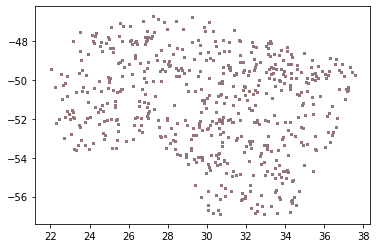

In [41]:
patches = []
for r in range(48):
    inreg = regions==r
    ras_in = ra[inreg]
    decs_in = dec[inreg]
    ra_inreg[ra_inreg>180]-=360
    plt.scatter(ra_inreg, dec_inreg, s=1)
    rarange  = [np.amin(ra[inreg]),np.amax(ra[inreg])]
    decrange = [np.amin(dec[inreg]),np.amax(dec[inreg])]
    angwidth = 1/2. #degrees
    pixheight,pixwidth=enmap.pixshape(act_car_map.shape,act_car_map.wcs) #radians
    width = int(np.deg2rad(angwidth)//pixwidth)
    patches_reg = []
    for i in range(len(ras_in)):
        coords = np.deg2rad(np.array((decs_in[i],ras_in[i])))
        ypix, xpix = enmap.sky2pix(act_car_map.shape, act_car_map.wcs, coords)
        left   = int(xpix - width)
        right  = int(xpix + width + 1)
        bottom = int(ypix - width)
        top    = int(ypix + width + 1)
        patch_avg = np.mean(act_car_map[bottom:top, left:right])
        patches_reg.append(patch_avg)
    patch_var = np.var(patches_reg)
    patches.append(patch_var)

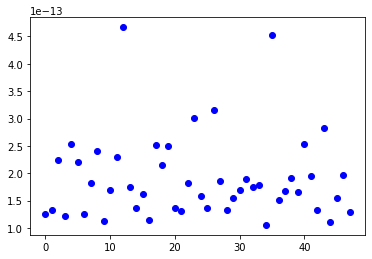

In [43]:
plt.plot(np.arange(48), patches, 'bo')